In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle
import numpy as np

In [3]:
from utils import load_and_mask_results

In [4]:
import matplotlib.pyplot as plt
from plotting import initialize_plot_settings, plot_results, plot_results_twopanel
initialize_plot_settings()

## Lidar baseline (single acquisition, no deformation)

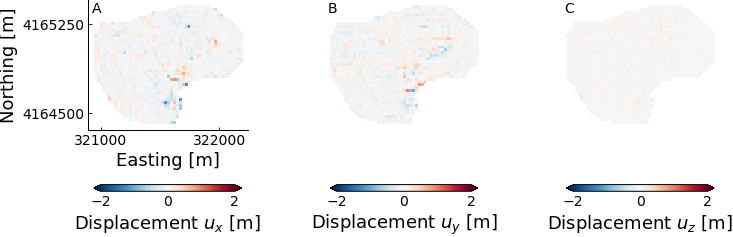

In [5]:
filename = f'results/lidar/HSLLidar_2017baseline_ICP_w50.00_str25.00.pkl'
x, y, uxl, uyl, uzl, residual, mask = load_and_mask_results(filename)
plot_results(x, y, uxl, uyl, uzl, remove_first_axes=False, plot_colorbars=True, vmin=-2, vmax=2)

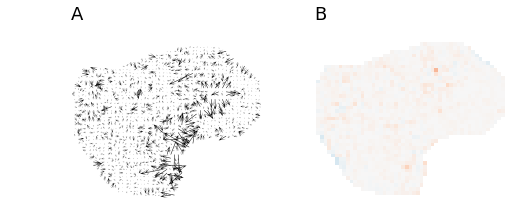

In [6]:
plot_results_twopanel(x, y, uxl, uyl, uzl, vmin=-1, vmax=1)

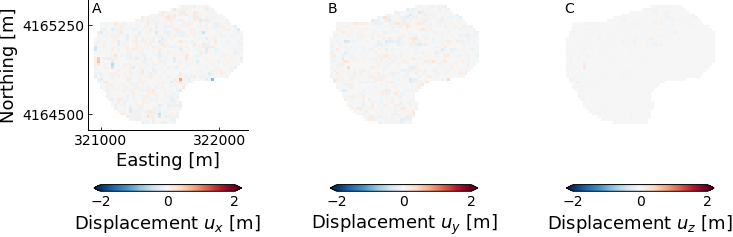

In [7]:
filename = f'results/lidar_filt/HSLLidar_2017_filtbaseline_ICP_w50.00_str25.00.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
plot_results(x, y, ux, uy, uz, remove_first_axes=False, plot_colorbars=True, vmin=-2, vmax=2)

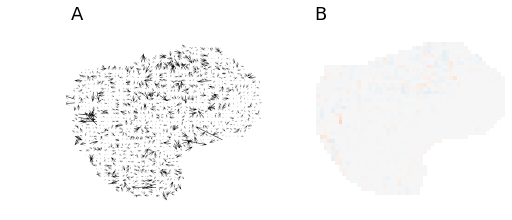

In [8]:
plot_results_twopanel(x, y, ux, uy, uz, vmin=-1, vmax=1)

## SFM baseline (10/14 vs 10/13, no deformation)

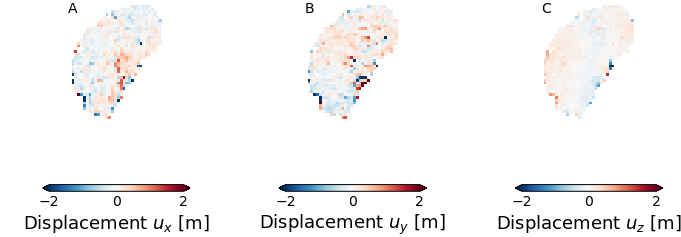

In [9]:
filename = f'results/sfm/HSLSurvey101419_utmbaseline_ICP_w50.00_str25.00.pkl'
x, y, uxs, uys, uzs, residual, mask = load_and_mask_results(filename)
plot_results(x, y, uxs, uys, uzs, remove_first_axes=True, plot_colorbars=True, vmin=-2, vmax=2)
#plt.savefig('/home/rmsare/fig/hsl_icp/Figure6_BaselineSFMa.png', dpi=300, bbox_inches='tight')

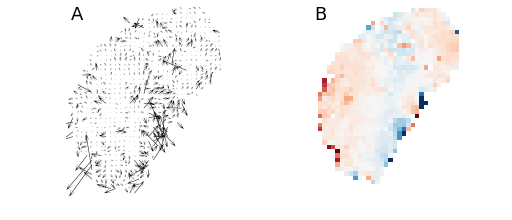

In [10]:
plot_results_twopanel(x, y, uxs, uys, uzs, vmin=-1, vmax=1)

In [ ]:
plt.figure()
n, bins, patches = plt.hist(uxs.ravel(), bins=30, range=[-2, 2], density=True, ec='w', color='k', alpha=0.5, label='SFM', zorder=1)
_ = plt.hist(uxl.ravel(), bins=bins, density=True,  ec='w', color='darkgray', alpha=0.5, label='Lidar', zorder=0)
plt.xlabel('Displacement $u_x$ [m]')
plt.ylabel('Frequency')
plt.legend()
#plt.savefig('/home/rmsare/fig/hsl_icp/Figure6_BaselineSFMb.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure()
n, bins, patches = plt.hist(uys.ravel(), bins=30, range=[-2, 2], density=True, ec='w', color='k', alpha=0.5, label='SFM', zorder=1)
_ = plt.hist(uyl.ravel(), bins=bins, density=True,  ec='w', color='darkgray', alpha=0.5, label='Lidar', zorder=0)
plt.xlabel('Displacement $u_y$ [m]')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('/home/rmsare/fig/hsl_icp/Figure6_BaselineSFMc.png', dpi=300, bbox_inches='tight')

In [ ]:
rs = np.sqrt(uxs.ravel() ** 2 + uys.ravel() ** 2)
ths = np.arctan2(uys.ravel(), uxs.ravel())
mask = rs < 5
ths = ths[mask]
rs = rs[mask]

rl = np.sqrt(uxl.ravel() ** 2 + uyl.ravel() ** 2)
thl = np.arctan2(uyl.ravel(), uxl.ravel())
mask = rl < 5
thl = thl[mask]
rl = rl[mask]

In [ ]:
plt.figure()
n, bins, patches = plt.hist(rs, bins=30, range=[0, 2.5], density=True, ec='w', color='k', alpha=0.5, label='SFM', zorder=1)
_ = plt.hist(rl, bins=bins, density=True,  ec='w', color='darkgray', alpha=0.5, label='Lidar', zorder=0)
plt.xlabel('Horizontal displacement [m]')
plt.ylabel('Density')
plt.xticks([0, 1.25, 2.5])
plt.ylim([0, 5.75])
plt.yticks([2.5, 5])
ax = plt.gca()
ax.set_aspect(0.75)
#plt.legend()
ax.text(0.1, 0.9, 'D', transform=ax.transAxes, fontsize=18)
plt.savefig('/home/rmsare/fig/hsl_icp/Figure6_BaselineSFMd.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure()
n, bins, patches = plt.hist(ths, bins=30, range=[0, 2.5], density=True, ec='w', color='k', alpha=0.5, label='SFM', zorder=1)
_ = plt.hist(thl, bins=bins, density=True,  ec='w', color='darkgray', alpha=0.5, label='Lidar', zorder=0)
plt.xlabel('Displacement direction [deg.]')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('/home/rmsare/fig/hsl_icp/Figure6_BaselineSFMe.png', dpi=300, bbox_inches='tight')

In [ ]:
ax = plt.subplot(111, projection='polar')
ax.grid(True, c='lightgray', ls=':', lw=2)

ax.plot(ths, rs, 'ko', mec='w', label='SFM', zorder=0)
ax.plot(thl, rl, 'wo', mec='k', label='Lidar', zorder=1)
ax.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2])
ax.set_yticks([0, 1, 2, 3, 4])
#ax.set_ylim([0, 2.5])
ax.legend(loc=[0.85, 0])
plt.savefig('/home/rmsare/fig/hsl_icp/Figure6_BaselineSFMf.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure()
n, bins, patches = plt.hist(uzs.ravel(), bins=30, range=[-1.25, 1.25], density=True, ec='w', color='k', alpha=0.5, label='SFM', zorder=1)
_ = plt.hist(uzl.ravel(), bins=bins, density=True,  ec='w', color='darkgray', alpha=0.5, label='Lidar', zorder=0)
plt.xlabel('Vertical displacement [m]')
#plt.ylabel('Density')
plt.xlim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([0, 5, 10])
ax = plt.gca()
ax.set_aspect(0.3)
plt.legend(loc='upper right', fontsize=14)
ax.text(0.05, 0.9, 'E', transform=ax.transAxes, fontsize=18)
#plt.savefig('/home/rmsare/fig/hsl_icp/Figure6_BaselineSFMg.png', dpi=300, bbox_inches='tight')